In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Задача (Вариант 13)
$
\begin{cases} 
\frac{d}{dx}[k(x)\frac{du}{dx}] - q(x)u = -f(x), \\
u(0) = 0, \\
u(1) = 1, \\
\end{cases} 
$  
РазрывнАя: $x_0 = 0.525$  
Для неё заданы условия:  
$u(x_0 - 0) = u(x_0 + 0)$  
$k(x_0 - 0)u_x(x_0 - 0) = k(x_0 + 0)u_x(x_0 + 0)$

In [11]:
x0 = 0
xL = 1

#Пусть сетка будет из 100000
L = 100000
x = np.linspace(x0, xL, L)

x_raz = 0.525 


## Поведение функций
$$
\begin{equation*}
k(x) = 
 \begin{cases}
   x + 1 ,& x < x_0\\
   x, & x > x_0
 \end{cases}
\end{equation*} 
$$  
$$
\begin{equation*}
q(x) = 
 \begin{cases}
   \exp(-x) ,& x < x_0\\
   \exp(-x), & x > x_0
 \end{cases}
\end{equation*} 
$$ 
$$ 
\begin{equation*}
f(x) = 
 \begin{cases}
   1, & x < x_0\\
   x^3, & x > x_0
 \end{cases}
\end{equation*} 
$$
 

In [12]:
def k(x):
    if(x < x_raz):
        return x + 1
    else:
        return x

def q(x):
    return math.exp(-x)
    
def f(x):
    if(x < x_raz):
        return 1
    else:
        return x**3

# Как решаем?
Совокупность точек $x_l = lh, l = \overline{1 \div L}$ образуют сеику. Пусть точка разрыва первого рода $x_0$ расположена между узлами $l_\alpha$ и $l_\beta$. Сформулируем разностную задачу, заменив во внутренних узловых точказ в исходном дифференциальном уравнении производные конечно разностными отношениями:

In [13]:
h = (xL - x0) / (L-1)
l_alpha = int(x_raz / h)
l_beta = l_alpha + 1

$$
\left[\frac{d}{dx}k(x)\frac{du}{dx}\right]_{x = x_l} \approx \frac{(k_\alpha)_{l+1/2}\displaystyle\frac{u_{l+1} - u_l}{h} - (k_\alpha)_{l-1/2}\displaystyle\frac{u_{l} - u_{l-1}}{h}}{h}, \;\;\; l = \overline{1 \div l_\alpha - 1}
$$

$$
\left[\frac{d}{dx}k(x)\frac{du}{dx}\right]_{x = x_l} \approx \frac{(k_\beta)_{l+1/2}\displaystyle\frac{u_{l+1} - u_l}{h} - (k_\beta)_{l-1/2}\displaystyle\frac{u_{l} - u_{l-1}}{h}}{h}, \;\;\; l = \overline{l_\beta + 1 \div L - 1}
$$

Где:  
$k_\alpha(x_l \pm h/2) = k_\alpha(x_{l \pm 1/2}) = (k_\alpha)_{l \pm 1/2}$  
$k_\beta(x_l \pm h/2) = k_\beta(x_{l \pm 1/2}) =(k_\beta)_{l \pm 1/2} $  

После подстановки этих выражений в дифференциальное уравнение приходим к системе линейных уравнений порядка $L-3$ относительно $L+1$ неизввестного значения сеточной функции $u_l$

$\displaystyle\frac{(k_\alpha)_{l+1/2}(u_{l+1} - u_l) - (k_\alpha)_{l-1/2}(u_{l} - u_{l-1})}{h^2} - (q_\alpha)_l u_l = -(f_\alpha)_l, \hspace{5mm}  l = \overline{1 \div l_\alpha - 1}$

$\displaystyle\frac{(k_\beta)_{l+1/2}(u_{l+1} - u_l) - (k_\beta)_{l-1/2}(u_{l} - u_{l-1})}{h^2} - (q_\beta)_l u_l = -(f_\beta)_l, \hspace{5mm} l = \overline{l_\beta + 1 \div L - 1}$

Добавляем к этой басне краевые усорвия и условия сопряжения на разрыве, получаем еще четыре линейных уравнения:  
$\begin{cases}
u_0 = u^0, \\
u_{l_\alpha} = u_{l_\beta}, \\
(k_\alpha)_{l_\alpha}\displaystyle\frac{u_{l_\alpha} - u_{l_\alpha - 1}}{h} = 
(k_\beta)_{l_\beta}\displaystyle\frac{u_{l_\beta + 1} - u_{l_\beta}}{h}, \\
u_L = u^1
\end{cases}
$

Преобразовывая две системы выше, группируем члены с одинаковыми неизвестными и введём обозначения:
$$
\begin{cases}
a_l = (k_\alpha)_{l + 1/2} \\
b_l = -\left[(k_\alpha)_{l + 1/2} + (k_\alpha)_{l - 1/2} + (q_\alpha)_l h^2 \right] \\
c_l = (k_\alpha)_{l - 1/2} \\
d_l = -(f_\alpha)_l h^2 \\
\end{cases}
\hspace{20mm} l = \overline{1 \div l_\alpha - 1}
$$

$$
\begin{cases}
a_l = (k_\beta)_{l + 1/2} \\
b_l = -\left[(k_\beta)_{l + 1/2} + (k_\beta)_{l - 1/2} + (q_\beta)_l h^2\right] \\
c_l = (k_\beta)_{l - 1/2} \\
d_l = -(f_\beta)_l h^2 \\
\end{cases}
\hspace{20mm} l = \overline{l_\beta + 1 \div L - 1}
$$

In [14]:
def get_coeffs_reduced_equation(l_alpha, l_beta, x0, xL, L):
    h = (xL - x0) / (L-1)

    a = np.zeros(L)
    b = np.zeros(L)
    c = np.zeros(L)
    d = np.zeros(L)

    for l in range(1, l_alpha):
        a[l] = k(l*h + h/2)
        b[l] = -( k(l*h + h/2) + k(l*h - h/2) + q(l*h) * h * h )
        c[l] = k(l*h - h/2)
        d[l] = -f(l* h) * h * h

    for l in range(l_beta + 1, L-1):
        a[l] = k(l*h + h/2)
        b[l] = -( k(l*h + h/2) + k(l*h - h/2) + q(l*h) * h * h )
        c[l] = k(l*h - h/2)
        d[l] = -f(l*h) * h * h
    
    return a, b, c, d

Тогда система переписывается в виде:
$$
\begin{cases}
u_0 = u^0, \\
a_l u_{l+1} + b_l u_l + c_l u_{l - 1} = d_l, \\
u_{l_\alpha} = u_{l_\beta}, \\\\
(k_\alpha)_{l_\alpha}(u_{l_\alpha} - u_{l_\alpha - 1}) = (k_\beta)_{l_\beta}(u_{l_\beta + 1} - u_{l_\beta}), \\
a_l u_{l+1} + b_l u_l + c_l u_{l - 1} = d_l,  \\
u_L = u^1
\end{cases}
$$

# Прогонка
Для начала разрешаем относительно $u_1$, подставляя $u_0$ во второе при $l=1$:

$u_1 =  -\frac{a_1}{b_1} u_2 + \frac{d_1 - c_1 u_0}{b_1} = \alpha_1 u_2 + \beta_1\\$  
Аналогично для $u_{L - 1}$:
      
$u_{L - 1} = -\frac{c_{L - 1}}{b_{L - 1}}u_{L - 2} + \frac{d_{L - 1} - c_{L - 1} u_L}{b_{L - 1}} = \alpha_{L - 1} u_{L - 2} + \beta_{L - 1}$  

  

Затем выражаем $u_l$:  
      
$u_{l - 1} = \alpha_{l - 1} u_l + \beta_{l - 1}, \hspace{15mm} l = \overline{1 \div l_\alpha - 1} \\
u_{l + 1} = \alpha_{l + 1} u_l + \beta_{l + 1}, \hspace{15mm} l = \overline{L - 1 \div l_\beta + 1}$   
Где прогоночные коэффициенты:  
$$
\\
\begin{cases}
\alpha_l = -\displaystyle\frac{a_l}{b_l + c_l \alpha_{l-1}} \\
\beta_l  =  \displaystyle\frac{d_l - c_l \beta_{l-1}}{b_l + c_l \alpha_{l - 1}}
\end{cases}
l = \overline{2 \div l_\alpha - 1}
$$

$$
\begin{cases}
\alpha_l = -\displaystyle\frac{c_l}{b_l + a_l \alpha_{l+1}} \\
\beta_l  =  \displaystyle\frac{d_l - a_l \beta_{l+1}}{b_l + a_l \alpha_{l + 1}}
\end{cases}
l = \overline{L - 2 \div l_\beta + 1}
$$

In [15]:
def get_run_through_coeffs(a, b, c, d, L, u0, uL):

    alpha = np.zeros(L)
    beta  = np.zeros(L)

    alpha[1] = -a[1] / b[1]
    beta[1]  = (d[1] - c[1] * u0) / b[1]

    alpha[L - 2] = -c[L - 2] / b[L - 2]
    beta[L - 2]  = (d[L - 2] - c[L - 2] * uL) / b[L - 2]

    for l in range(2, l_alpha):
        alpha[l] = -a[l] / (b[l] +c[l] * alpha[l - 1])
        beta[l]  = (d[l] - c[l] * beta[l - 1]) / (b[l] + c[l] *alpha[l - 1])

    for l in range(L - 3, l_beta, -1):
        alpha[l] = -c[l] / (b[l] + a[l] * alpha[l + 1])
        beta[l]  = (d[l] - a[l] * beta[l + 1]) / (b[l] + a[l] * alpha[l + 1])
    
    return alpha, beta


У разрывной точки, рассматривая поподробней, получаем следующие уравнения:
$$
\begin{cases}
u_{l_\alpha} = u_{l_\beta} = \displaystyle\frac{(k_\alpha)_{l_\alpha}\beta_{l_\alpha - 1} + (k_\beta)_{l_\beta}\beta_{l_\beta + 1}}{(k_\alpha)_{l_\alpha}(1 - \alpha_{l_\alpha - 1}) + (k_\beta)_{l_\beta} (1 - \alpha_{l_\beta + 1})} \\
u_{l_\alpha - 1} = \alpha_{l_\alpha - 1} u_{l_\alpha} + \beta_{l_\alpha - 1} \\
u_{l_\beta + 1} = \alpha_{l_\beta + 1} u_{l_\beta} + \beta_{l_\beta + 1}
\end{cases}
$$

В конце, выполняем обратную прогонку, и получаем сеточную функцию $u$

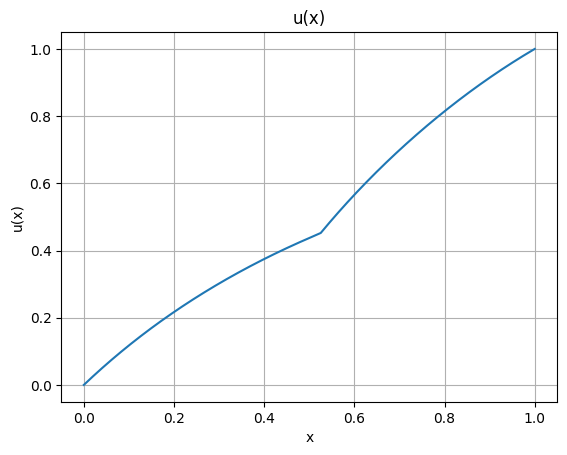

In [16]:
def get_solution(l_alpha, l_beta, x0 = 0, xL = 1, L = 100000, u0 = 0, uL = 1):

    a, b, c, d = get_coeffs_reduced_equation(l_alpha, l_beta, x0, xL, L)
    alpha, beta = get_run_through_coeffs(a, b, c, d, L, u0, uL)

    u = np.zeros(L)

    u[0] = u0
    u[L-1] = uL

    u[l_alpha] = (k(l_alpha*h) * beta[l_alpha - 1] + k(l_beta*h) *beta[l_beta + 1]) / ( k(l_alpha*h) * (1 - alpha[l_alpha - 1]) + k(l_beta*h) * (1 - alpha[l_beta + 1]) )
    u[l_beta] = u[l_alpha]

    u[l_alpha - 1] = alpha[l_alpha - 1] * u[l_alpha] + beta[l_alpha - 1]
    u[l_beta + 1] = alpha[l_beta + 1] * u[l_beta] + beta[l_beta + 1]

    for l in range(l_alpha - 1, 0, -1):
        u[l] = alpha[l] * u[l + 1] + beta[l]

    for l in range(l_beta + 1, L-1):
        u[l] = alpha[l] * u[l - 1] + beta[l]

    return u


u = get_solution(l_alpha, l_beta)

plt.plot(x, u)
plt.title("u(x)")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid()
plt.show()